# Three classics

In this notebook we will focus on three classic books: "On the origin of species", written by the biologist Charles Darwin, "The wretched of the earth", written by the postcolonial psychopathologist Frantz Fanon, and "Atlas Shrugged", written by the philosopher and novelist Ayn Rand. Although each of these books is worth reading - manually, with your eyes - we will explore some basic techniques to study them digitally.

Before you start this session, we have to run the following cell, to import and install the necessary packages.

In [1]:
import sys
!pip install nltk
!pip install spacy
!pip install textract
!{sys.executable} -m spacy download en
import string
import re
import glob
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import spacy
import textract

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 5.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 6.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 7.7 MB/s eta 0:00:0000:010:01m
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 9.4 MB/s eta 0:00:00:00:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.5/128.5 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 18.1 MB/s

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Cleaning text

## Intro

In order to make sense of large (numbers of) texts we need to "clean the text up". As somebody once said: "If you want to find pearls, you first have to sift through the mud to find oysters".

So with that in mind, let's dive for some pearls!

## Functions

We begin by writing four functions that each clean the text up in a particular way. The functions can then be used as "black boxes" later on ("black box" in the sense that we provide the input, and the function provides the output).

To see how a function works, you could play around with the simple functions below.

In [41]:
def student_test(input):
    output = f"This function prints a sentence based on the following inputs: {input}"
    return output

student_test("functions are great")

'This function prints a sentence based on the following inputs: functions are great'

In [3]:
def student_test(input):
    output = 2 * input
    return output

student_test(10)

20

## Stopwords

Let's have a look at our first "cleaning function". This one takes text as input, and removes so-called "stopwords".

The point is that many of the small words in a sentence don't really matter to us. 

To analyze the previous sentence, you e.g. don't need "a", "don't" or "to".

In [4]:
def stopwords_clean(text):
    not_stop=[]
    stop_words = set(stopwords.words('english'))
    words = text.split(" ")
    for i in words:
        if i not in stop_words:
            not_stop.append(i)
    return " ".join(not_stop)
    

You can see that the function does just that:

In [15]:
stopwords_clean("The point is that many of the small words in a sentence don't really matter to us.")

'The point many small words sentence really matter us.'

Let's take a look at these stopwords:

In [23]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

## Removing newlines, punctuation and capitals

Let's take a look at the following sentence:

"It's Sunday 13 Feb 23:45 and I don't have the inspiration to come up with a good sentence".

From this sentence we want to remove newlines (which - to be clear - it doesn't have), numbers and punctuation.

In [6]:
def regex_clean(text):
    text_no_newline = text.replace('\n', ' ')
    text_no_punct = text_no_newline.translate(str.maketrans('', '', "—%s" % string.punctuation))
    text_output = re.sub(r'[0-9]+','', text_no_punct)
    return text_output
    

Try it yourself by running the function below.

In [7]:
regex_clean("It is 23:45 and I don't have the inspiration to come up with a good sentence")

'It is  and I dont have the inspiration to come up with a good sentence'

As you can see "don't" is changed into "dont". But remember that the function "stopwords" already takes out "don't". This is what happens when you run both functions on the same sentence:

In [8]:
regex_clean(stopwords_clean("It is 23:45 and I don't have the inspiration to come up with a good sentence"))

'It  I inspiration come good sentence'

## Removing capitals

The third function removes unwanted capitals from the input (text). 

In the sentence "Cats like to chase other cats" we want "Cats" and "cats" to be counted as the same thing. Because they are.

At the same time, in the sentence "Why does Apple have an apple as a logo?" we don't want "Apple" and "apple to be counted as the same thing. Because they aren not.

There are many ways to deal with this, but the function below does the following:

1) it turns the first letter of every line into a "lower case" character, and...
2) it turns any letter after a ". " (after a period and space) into a lower case character (i.e. the first letter of a new sentence). 

(To do this we make use of "regex". This is a fancy way of automatically selecting text. If you are super excitied about automatically selecting text, you can go and play [here](https://regexr.com/)).

In [9]:
def case_clean(text):
    # text_output = re.sub(r'^[a-zA-Z]|[a-z][a-z]\. [A-Z]', lambda m: m.group(0).lower(), text)
    text_output = re.sub(r'\w+', lambda x: x.group(0).lower(), text)
    return text_output

You can see that this function works well with both the cats and the apples:

In [26]:
case_clean("Cats like to chase other cats")

'cats like to chase other cats'

In [11]:
case_clean("Why does Apple have an apple as a logo?")

'why does apple have an apple as a logo?'

## Lemmatize

Finally, in the last function, we ["lemmatize"](https://en.wikipedia.org/wiki/Lemmatisation) words. This function turns "cats" and "chasing" into their basic form ("cat", "chase"). 

In [12]:
def lemmatize_clean(text):
    words = text.split(" ")
    nlp = spacy.load("en_core_web_sm")
    
    # Cutting the text up in parts of 1000 words (because constraints nlp)
    chunked_list = list()
    chunk_size = 1000
    for i in range(0, len(text), chunk_size):
        chunked_list.append(text[i:i+chunk_size])
        
    tot=[]
    for i in chunked_list:
        # print(i)
        doc = nlp(i)
        for token in doc:
            # print(token)
            tot.append(token.lemma_)
    return " ".join(tot)
    

## Four powers combined

Check out what happens when we combine the four functions together:

In [40]:
text = "Cat's don't make sense. It's 23:00 and the cats of the neighbour (Pluisje and Mr. Bean) are chasing my cat (Billy de kat) other like there is no tomorrow."

# Run functions
text_regex = regex_clean(text)
text_lem = lemmatize_clean(text_regex)
text_case = case_clean(text_lem)
output = stopwords_clean(text_case)

print(output)

cat make sense   cat neighbour pluisje mr bean chase cat billy de kat like tomorrow


As you can see the functions remove numbers, unwanted capitals and punctuation, and they bring the words back to their "essence" (see [the wiki of Lemmatization](https://en.wikipedia.org/wiki/Lemmatisation) for a better description).

# Some real texts

Let's apply these functions to some classical texts. Each of these texts have shaped the world in their own way. Please have a look at their wikis (and add them to your reading list), before we delve into the code.

* Ayn Rand - 1957 - Atlas shrugged ([wiki](https://en.wikipedia.org/wiki/Atlas_Shrugged)).  
* Frantz Fanon - 1961 - The wretched of the earth ([wiki](https://en.wikipedia.org/wiki/The_Wretched_of_the_Earth)).
* Darwin - 1859 - On the origin of species ([wiki](https://en.wikipedia.org/wiki/On_the_Origin_of_Species)).


## Initialization

Before we can import the books, and run the functions above, we need to load and import some python packages. We already did this at the start, but if you ever come back here to copy code, remember that this step is necessary to make things work.

## Let's get the pdf's

In the folder "../../data/raw/classics/pdf/" you can find the three books in pdf. You can navigate to the folder in the sidebar on the left. Try it out, and open the pdfs.

In the code below, we get the books from the folder, we take the text, and we save the text in .txt files in the folder "../../data/raw/classics/txt/".

Run the code. It might take a while (if there is an * next to the cell, it's still running). When it's done, check if the .txt files are indeed in the above-mentioned folder.

Open the .txt files. A bit messy right? Time to clean it up!

In [18]:
for filename in glob.glob('../../data/raw/classics/pdf/*.pdf'):
    
    name = filename.split("/")[-1].split(".")[-2]
    print(f"{name}.txt")
    
    text = textract.process(filename).decode("utf8")
                     
    filesave = "../../data/raw/classics/txt/%s.txt" % name    
    with open(filesave, 'w') as f:
        f.write(text)

Rand_1983_Atlas_shrugged.txt
Fanon_1965_The_wretched_of_the_earth.txt
Darwin_1859_The_origin_of_species.txt


## Cleaning

Now it's time to take the four functions that we described above, and apply them to the three books. Please note that this can take a while. Maybe this is a good time to stand up and do some stretching exercises.

We save the output in a new folder "../../data/processed/classics/". 

Have a look at the text files in that folder. 

At this point, the texts are clean enough to play with. Let's analyze and visualize!

In [ ]:
for filename in glob.glob('../../data/raw/classics/txt/*.txt'):
    print(filename)
    name = filename.split("/")[-1].split(".")[-2]

    file = open(filename, 'rt')
    text = file.read()
    file.close()
    
    # Run functions
    text_regex = regex_clean(text)
    text_lem = lemmatize_clean(text_regex)
    text_case = case_clean(text_lem)
    output = stopwords_clean(text_case)
    
    filesave = "../../data/processed/classics/%s_clean.txt" % name 
    print(filesave)
    with open(filesave, 'w') as f:
        f.write(output)

../../data/raw/classics/txt/Darwin_1859_The_origin_of_species.txt
../../data/processed/classics/Darwin_1859_The_origin_of_species_clean.txt
../../data/raw/classics/txt/Fanon_1965_The_wretched_of_the_earth.txt
../../data/processed/classics/Fanon_1965_The_wretched_of_the_earth_clean.txt
../../data/raw/classics/txt/Rand_1983_Atlas_shrugged.txt
../../data/processed/classics/Rand_1983_Atlas_shrugged_clean.txt


# Analyzing text

Once you have cleaned the text, it is possible to run all kinds of analyses, ranging from simple wordclouds, to more complex stuff like sentiment analysis, topic analysis and network analysis. We will explore all of them, but for now, we will keep it simple.

The code below counts how often words appear in the cleaned text, and shows us the top ten words.

The code at the very bottom shows you the [wordcloud](https://en.wikipedia.org/wiki/Tag_cloud) for the three books.

Does it fit with what you read about the three books in the wiki?


In [43]:
from collections import Counter

for filename in glob.glob('./../../data/processed/classics/*.txt'):
    name = filename.split("/")[-1].split(".")[-2]
    print(name)
 
    file = open(filename)
    text = file.read()
    file.close

    wordlist = text.split(" ")
    c = Counter(wordlist)
    print(c.most_common(30)[1:])


Rand_1983_Atlas_shrugged_clean
[('say', 3297), ('know', 2942), ('man', 2323), ('see', 2232), ('\x0c', 2105), ('look', 2064), ('think', 1902), ('would', 1859), ('one', 1797), ('go', 1560), ('could', 1499), ('like', 1450), ('make', 1409), ('want', 1378), ('rearden', 1300), ('feel', 1288), ('taggart', 1203), ('face', 1189), ('give', 1148), ('ask', 1023), ('come', 980), ('get', 956), ('tell', 931), ('time', 909), ('answer', 884), ('take', 870), ('voice', 851), ('nothing', 851), ('mr', 836)]
Darwin_1859_The_origin_of_species_clean
[('specie', 1696), ('form', 838), ('one', 797), ('would', 686), ('may', 654), ('case', 645), ('many', 605), ('animal', 523), ('variety', 516), ('plant', 514), ('selection', 502), ('natural', 488), ('great', 483), ('part', 465), ('two', 459), ('see', 441), ('\x0c', 434), ('thus', 382), ('condition', 369), ('several', 363), ('character', 352), ('different', 352), ('number', 351), ('distinct', 349), ('period', 341), ('give', 338), ('life', 335), ('structure', 324), (

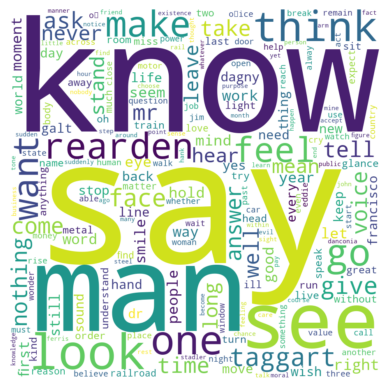

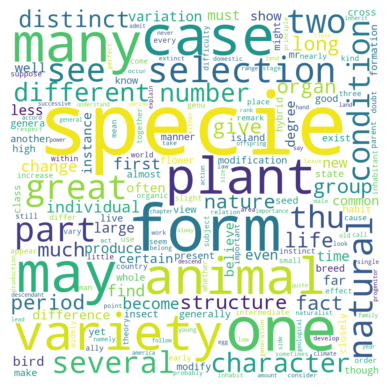

In [ ]:
!pip install WordCloud
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

for filename in glob.glob('./../../data/processed/classics/*.txt'):

    file = open(filename)
    text = file.read()
    file.close

    word_cloud = WordCloud(collocations = False, background_color = 'white',width=900,height=900).generate(text)

    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()